In [ ]:
import sys, os
sys.path.append(os.path.abspath('../'))

In [ ]:
from utils import *

In [ ]:
annotation_file = "../data/person_detection_and_tracking_results_drop-Gaitparams_PD.pkl"
target_file = "../data/targets_dataframe-Gaitparams_PD.pkl"

In [ ]:
target_data = load_target_data(annotation_file, target_file)
target_data.head()

## Before angle normalization

In [ ]:
cols = ['Toe In / Out/L', 'Toe In / Out/R']
target_data[cols].describe()

In [ ]:
target_data[cols].plot.hist(bins=100, figsize=(10,10))

## After angle normalization

In [ ]:
target_data = load_target_data(annotation_file, target_file)
pick = 'change_offset'
cols = ['Toe In / Out/L', 'Toe In / Out/R']

mapping_fun = {
    'change_offset': lambda x: -x+90,
    'deg2rad': lambda x: x * np.pi / 180
}

target_data[cols] = target_data[cols].apply(mapping_fun[pick])

target_data[cols].describe()

In [ ]:
target_data[cols].plot.hist(bins=100, figsize=(10,10))

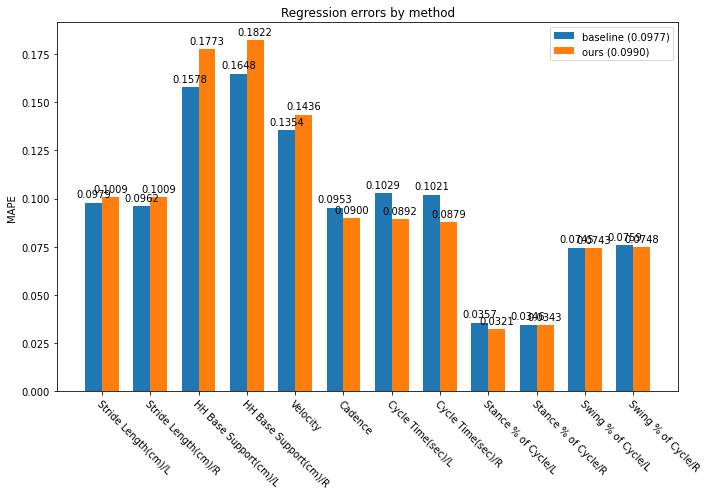

In [25]:
import matplotlib.pyplot as plt
import numpy as np

baseline = {'Stride Length(cm)/L': 0.0978684, 'Stride Length(cm)/R': 0.09619947, 'HH Base Support(cm)/L': 0.15780641, 'HH Base Support(cm)/R': 0.16476612, 'Velocity': 0.13537064, 'Cadence': 0.09533153, 'Cycle Time(sec)/L': 0.102855936, 'Cycle Time(sec)/R': 0.1020871, 'Stance % of Cycle/L': 0.035698097, 'Stance % of Cycle/R': 0.034582235, 'Swing % of Cycle/L': 0.07451595, 'Swing % of Cycle/R': 0.07585853}
ours = {'Stride Length(cm)/L': 0.100894354, 'Stride Length(cm)/R': 0.10085594, 'HH Base Support(cm)/L': 0.17733766, 'HH Base Support(cm)/R': 0.18224221, 'Velocity': 0.14357261, 'Cadence': 0.089958504, 'Cycle Time(sec)/L': 0.08922364, 'Cycle Time(sec)/R': 0.08793751, 'Stance % of Cycle/L': 0.032127835, 'Stance % of Cycle/R': 0.034298204, 'Swing % of Cycle/L': 0.07431165, 'Swing % of Cycle/R': 0.07482254}

labels = list(baseline.keys())
baseline_means = list(baseline.values())
ours_means = list(ours.values())

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10,7))
rects1 = ax.bar(x - width/2, baseline_means, width, label='baseline ({:.4f})'.format(np.mean(baseline_means)))
rects2 = ax.bar(x + width/2, ours_means, width, label='ours ({:.4f})'.format(np.mean(ours_means)))

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('MAPE')
ax.set_title('Regression errors by method')
ax.set_xticks(x, labels, rotation=-45, ha="left", rotation_mode="anchor") 
ax.legend()

ax.bar_label(rects1, padding=3, fmt="%.4f")
ax.bar_label(rects2, padding=3, fmt="%.4f")

fig.tight_layout()

plt.show()